In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec
from pylab import *
from netCDF4 import Dataset,num2date,date2num
import os
import pdb
import rasterio
import seaborn as sns
import warnings
import geopandas as gpd

path = os.getcwd() + '/'
path_si_in = 'NC_IN_NO_IN/SI_IN_'
path_no_in = 'NC_IN_NO_IN/NO_IN_'


# DATOS BOXPLOT

In [2]:
data_tem_no = pd.read_csv('DATA_METEO_IN/NO_IN_2m_temperature.csv', index_col = 0, parse_dates = True)
data_tem_si = pd.read_csv('DATA_METEO_IN/SI_IN_2m_temperature.csv', index_col = 0, parse_dates = True)
data_rad_no = pd.read_csv('DATA_METEO_IN/NO_IN_surface_solar_radiation_downwars.csv', index_col = 0, parse_dates = True)
data_rad_si = pd.read_csv('DATA_METEO_IN/SI_IN_surface_solar_radiation_downwars.csv', index_col = 0, parse_dates = True)
data_dew_no = pd.read_csv('DATA_METEO_IN/NO_IN_2m_dewpoint_temperature.csv', index_col = 0, parse_dates = True)
data_dew_si = pd.read_csv('DATA_METEO_IN/SI_IN_2m_dewpoint_temperature.csv', index_col = 0, parse_dates = True)

data_dew_no   = 100*(np.exp((17.625*data_dew_no)/(243.04+data_dew_no))/np.exp((17.625*data_tem_no)/(243.04+data_tem_no)))
data_dew_si   = 100*(np.exp((17.625*data_dew_si)/(243.04+data_dew_si))/np.exp((17.625*data_tem_si)/(243.04+data_tem_si)))

data_soil_no = pd.read_csv('DATA_METEO_IN/NO_IN_soil_temperature_level_1.csv', index_col = 0, parse_dates = True)
data_soil_si = pd.read_csv('DATA_METEO_IN/SI_IN_soil_temperature_level_1.csv', index_col = 0, parse_dates = True)
data_uwind_no = pd.read_csv('DATA_METEO_IN/NO_IN_10m_u_component_of_wind.csv', index_col = 0, parse_dates = True)
data_uwind_si = pd.read_csv('DATA_METEO_IN/SI_IN_10m_u_component_of_wind.csv', index_col = 0, parse_dates = True)
data_uwind_no = abs(data_uwind_no)
data_uwind_si = abs(data_uwind_si)


data_vwind_no = pd.read_csv('DATA_METEO_IN/NO_IN_10m_v_component_of_wind.csv', index_col = 0, parse_dates = True)
data_vwind_si = pd.read_csv('DATA_METEO_IN/SI_IN_10m_v_component_of_wind.csv', index_col = 0, parse_dates = True)
data_vwind_no = abs(data_vwind_no)
data_vwind_si = abs(data_vwind_si)
data_wind_no = np.sqrt(data_vwind_no**2 + data_uwind_no**2) 
data_wind_si = np.sqrt(data_vwind_si**2 + data_uwind_si**2) 

data_leafh_no = pd.read_csv('DATA_METEO_IN/NO_IN_leaf_area_index_high_vegetation.csv', index_col = 0, parse_dates = True)
data_leafh_si = pd.read_csv('DATA_METEO_IN/SI_IN_leaf_area_index_high_vegetation.csv', index_col = 0, parse_dates = True)
data_leafl_no = pd.read_csv('DATA_METEO_IN/NO_IN_leaf_area_index_low_vegetation.csv', index_col = 0, parse_dates = True)
data_leafl_si = pd.read_csv('DATA_METEO_IN/SI_IN_leaf_area_index_low_vegetation.csv', index_col = 0, parse_dates = True)
data_skin_no = pd.read_csv('DATA_METEO_IN/NO_IN_skin_reservoir_content.csv', index_col = 0, parse_dates = True)
data_skin_si = pd.read_csv('DATA_METEO_IN/SI_IN_skin_reservoir_content.csv', index_col = 0, parse_dates = True)
data_vol_no = pd.read_csv('DATA_METEO_IN/NO_IN_volumetric_soil_water_layer_1.csv', index_col = 0, parse_dates = True)
data_vol_si = pd.read_csv('DATA_METEO_IN/SI_IN_volumetric_soil_water_layer_1.csv', index_col = 0, parse_dates = True)
data_pre_no = pd.read_csv('DATA_METEO_IN/NO_IN_total_precipitation.csv', index_col = 0, parse_dates = True)
data_pre_si = pd.read_csv('DATA_METEO_IN/SI_IN_total_precipitation.csv', index_col = 0, parse_dates = True)
data_eva_no = pd.read_csv('DATA_METEO_IN/NO_IN_evaporation.csv', index_col = 0, parse_dates = True)
data_eva_si = pd.read_csv('DATA_METEO_IN/SI_IN_evaporation.csv', index_col = 0, parse_dates = True)

#data_pre_no = abs(data_pre_no)
#data_pre_si = abs(data_pre_si)

data_pre_no.loc[data_pre_no['Valor'] < 0, 'Valor'] = 0
data_pre_si.loc[data_pre_si['Valor'] < 0, 'Valor'] = 0

In [3]:
data_tem_no['Incendios']   = 'Days without wildfire'
data_tem_si['Incendios']   = 'Days with wildfire'
data_rad_no['Incendios']   = 'Days without wildfire'
data_rad_si['Incendios']   = 'Days with wildfire'
data_dew_no['Incendios']   = 'Days without wildfire'
data_dew_si['Incendios']   = 'Days with wildfire'
data_soil_no['Incendios']  = 'Days without wildfire'
data_soil_si['Incendios']  = 'Days with wildfire'
data_uwind_no['Incendios'] = 'Days without wildfire'
data_uwind_si['Incendios'] = 'Days with wildfire'
data_vwind_no['Incendios'] = 'Days without wildfire'
data_vwind_si['Incendios'] = 'Days with wildfire'
data_wind_no['Incendios']  = 'Days without wildfire'
data_wind_si['Incendios']  = 'Days with wildfire'
data_leafh_no['Incendios'] = 'Days without wildfire'
data_leafh_si['Incendios'] = 'Days with wildfires'
data_leafl_no['Incendios'] = 'Days without wildfire'
data_leafl_si['Incendios'] = 'Days with wildfire'
data_skin_no['Incendios']  = 'Days without wildfire'
data_skin_si['Incendios']  = 'Days with wildfire'
data_vol_no['Incendios']   = 'Days without wildfire'
data_vol_si['Incendios']   = 'Days with wildfire'
data_pre_no['Incendios']   = 'Days without wildfire'
data_pre_si['Incendios']   = 'Days with wildfire'
data_eva_no['Incendios']   = 'Days without wildfire'
data_eva_si['Incendios']   = 'Wildfire precence '

data_tem_no['month'] = data_tem_no.index.strftime('%b')
data_tem_si['month'] = data_tem_si.index.strftime('%b')
data_rad_no['month'] = data_rad_no.index.strftime('%b')
data_rad_si['month'] = data_rad_si.index.strftime('%b')
data_dew_no['month'] = data_dew_no.index.strftime('%b')
data_dew_si['month'] = data_dew_si.index.strftime('%b')
data_soil_no['month'] = data_soil_no.index.strftime('%b')
data_soil_si['month'] = data_soil_si.index.strftime('%b')
data_uwind_no['month'] = data_uwind_no.index.strftime('%b')
data_uwind_si['month'] = data_uwind_si.index.strftime('%b')
data_vwind_no['month'] = data_vwind_no.index.strftime('%b')
data_vwind_si['month'] = data_vwind_si.index.strftime('%b')
data_wind_no['month'] = data_vwind_no.index.strftime('%b')
data_wind_si['month'] = data_vwind_si.index.strftime('%b')
data_leafh_no['month'] = data_leafh_no.index.strftime('%b')
data_leafh_si['month'] = data_leafh_si.index.strftime('%b')
data_leafl_no['month'] = data_leafl_no.index.strftime('%b')
data_leafl_si['month'] = data_leafl_si.index.strftime('%b')
data_skin_no['month'] = data_skin_no.index.strftime('%b')
data_skin_si['month'] = data_skin_si.index.strftime('%b')
data_vol_no['month'] = data_vol_no.index.strftime('%b')
data_vol_si['month'] = data_vol_si.index.strftime('%b')
data_pre_no['month'] = data_pre_no.index.strftime('%b')
data_pre_si['month'] = data_pre_si.index.strftime('%b')
data_eva_no['month'] = data_eva_no.index.strftime('%b')
data_eva_si['month'] = data_eva_si.index.strftime('%b')

In [4]:
def trimestre_eng(data):
    lista_meses = []
    for i in np.arange(0,len(data),1):
        mes = data['month'][i]
        if mes == 'Dec' or mes == 'Jan' or mes == 'Feb':
            lista_meses.append('DJF')

        if mes == 'Mar' or mes == 'Apr' or mes == 'May':
            lista_meses.append('MAM') 

        if mes == 'Jun' or mes == 'Jul' or mes == 'Aug':
            lista_meses.append('JJA')

        if mes == 'Sep' or mes == 'Oct' or mes == 'Nov':
            lista_meses.append('SON')
            
    return lista_meses

# DATOS NC

In [5]:
nc_tem     = xr.open_dataset('../../redes/AL/DATA_DAY/2m_temperature.nc')-273.15
nc_tem_si     = xr.open_dataset(path_si_in + '2m_temperature.nc')
nc_rad_si     = xr.open_dataset(path_si_in + 'surface_solar_radiation_downwars.nc')
nc_soiltem_si = xr.open_dataset(path_si_in + 'soil_temperature_level_1.nc')
nc_pre_si     = xr.open_dataset(path_si_in + 'total_precipitation.nc')
nc_dew_si     = xr.open_dataset(path_si_in + '2m_dewpoint_temperature.nc')
nc_RH_si      = xr.open_dataset(path_si_in + 'RH.nc')
nc_uwind_si   = xr.open_dataset(path_si_in + '10m_u_component_of_wind.nc')
nc_vwind_si   = xr.open_dataset(path_si_in + '10m_v_component_of_wind.nc')
nc_WIND_si    = xr.open_dataset(path_si_in + 'WIND.nc')
nc_leafhigh_si= xr.open_dataset(path_si_in + 'leaf_area_index_high_vegetation.nc')
nc_leaflow_si = xr.open_dataset(path_si_in + 'leaf_area_index_low_vegetation.nc')
nc_skin_si    = xr.open_dataset(path_si_in + 'skin_reservoir_content.nc')
nc_vol_si     = xr.open_dataset(path_si_in + 'volumetric_soil_water_layer_1.nc')
nc_eva_si     = xr.open_dataset(path_si_in + 'evaporation.nc')

nc_tem_no     = xr.open_dataset(path_no_in + '2m_temperature.nc')
nc_rad_no     = xr.open_dataset(path_no_in + 'surface_solar_radiation_downwars.nc')
nc_soiltem_no = xr.open_dataset(path_no_in + 'soil_temperature_level_1.nc')
nc_pre_no     = xr.open_dataset(path_no_in + 'total_precipitation.nc')
nc_dew_no     = xr.open_dataset(path_no_in + '2m_dewpoint_temperature.nc')
nc_RH_no      = xr.open_dataset(path_no_in + 'RH.nc')
nc_uwind_no   = xr.open_dataset(path_no_in + '10m_u_component_of_wind.nc')
nc_vwind_no   = xr.open_dataset(path_no_in + '10m_v_component_of_wind.nc')
nc_WIND_no    = xr.open_dataset(path_no_in + 'WIND.nc')
nc_leafhigh_no= xr.open_dataset(path_no_in + 'leaf_area_index_high_vegetation.nc')
nc_leaflow_no = xr.open_dataset(path_no_in + 'leaf_area_index_low_vegetation.nc')
nc_skin_no    = xr.open_dataset(path_no_in + 'skin_reservoir_content.nc')
nc_vol_no     = xr.open_dataset(path_no_in + 'volumetric_soil_water_layer_1.nc')
nc_eva_no     = xr.open_dataset(path_no_in + 'evaporation.nc')


hots  = xr.open_dataset('Hotspots_count.nc')
nc_hots  = hots.sum(dim='time')
hots_sum  = hots.Hotspots.sum(dim='time')

In [6]:
##Read the topography
topo = '../../GUIA_GRAFICAS/GMRTv3_6_20190709topo.grd'
vart = Dataset(topo, mode='r')
xtopo=np.arange(vart.variables['x_range'][0],vart.variables['x_range'][1]+0.5*vart.variables['spacing'][0],vart.variables['spacing'][0])
ytopo=np.arange(vart.variables['y_range'][0],vart.variables['y_range'][1]+0.5*vart.variables['spacing'][1],vart.variables['spacing'][1])
xt0,yt0=np.meshgrid(xtopo,ytopo)
z = vart.variables['z'][:]
z = np.reshape(z, xt0.shape)[::-1,:]


depts = 'AmericaSur/america del sur geogpsperu.shp'
oceano = 'STUDY_AREA/OCEANO3.shp'
oceano = gpd.read_file(oceano)
oceano = oceano.to_crs("EPSG:4326")

In [24]:
data_no = [data_tem_no,data_dew_no,   
    data_rad_no,data_soil_no,data_eva_no
           ,data_pre_no,data_wind_no,data_skin_no,
            data_leafh_no,data_vol_no,
           data_leafl_no]

data_si = [data_tem_si,data_dew_si,
    data_rad_si,data_soil_si,data_eva_si,
           data_pre_si,data_wind_si,data_skin_si,
            data_leafh_si,
           data_vol_si,data_wind_si,
           data_leafl_si]

for i in np.arange(0,len(data_no)):
    lista_no = trimestre_eng(data_no[i])
    data_no[i]['trimestre'] = lista_no
    
for i in np.arange(0,len(data_si)):
    lista_si = trimestre_eng(data_si[i])
    data_si[i]['trimestre'] = lista_si
    
    
data_name = [
    
    'data_rad','data_tem', 'data_soil','data_eva',
             'data_dew','data_pre','data_vol','data_wind',
             'data_skin','data_leafh','data_leafl']


data_name2 = data_name.copy()
    
for i in np.arange(0,len(data_name)):
    data_name[i]  = pd.concat([data_no[i],data_si[i]], axis = 0)
        
    data_name[i]['Valor'] = data_name[i]['Valor']

/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ailindaiana/

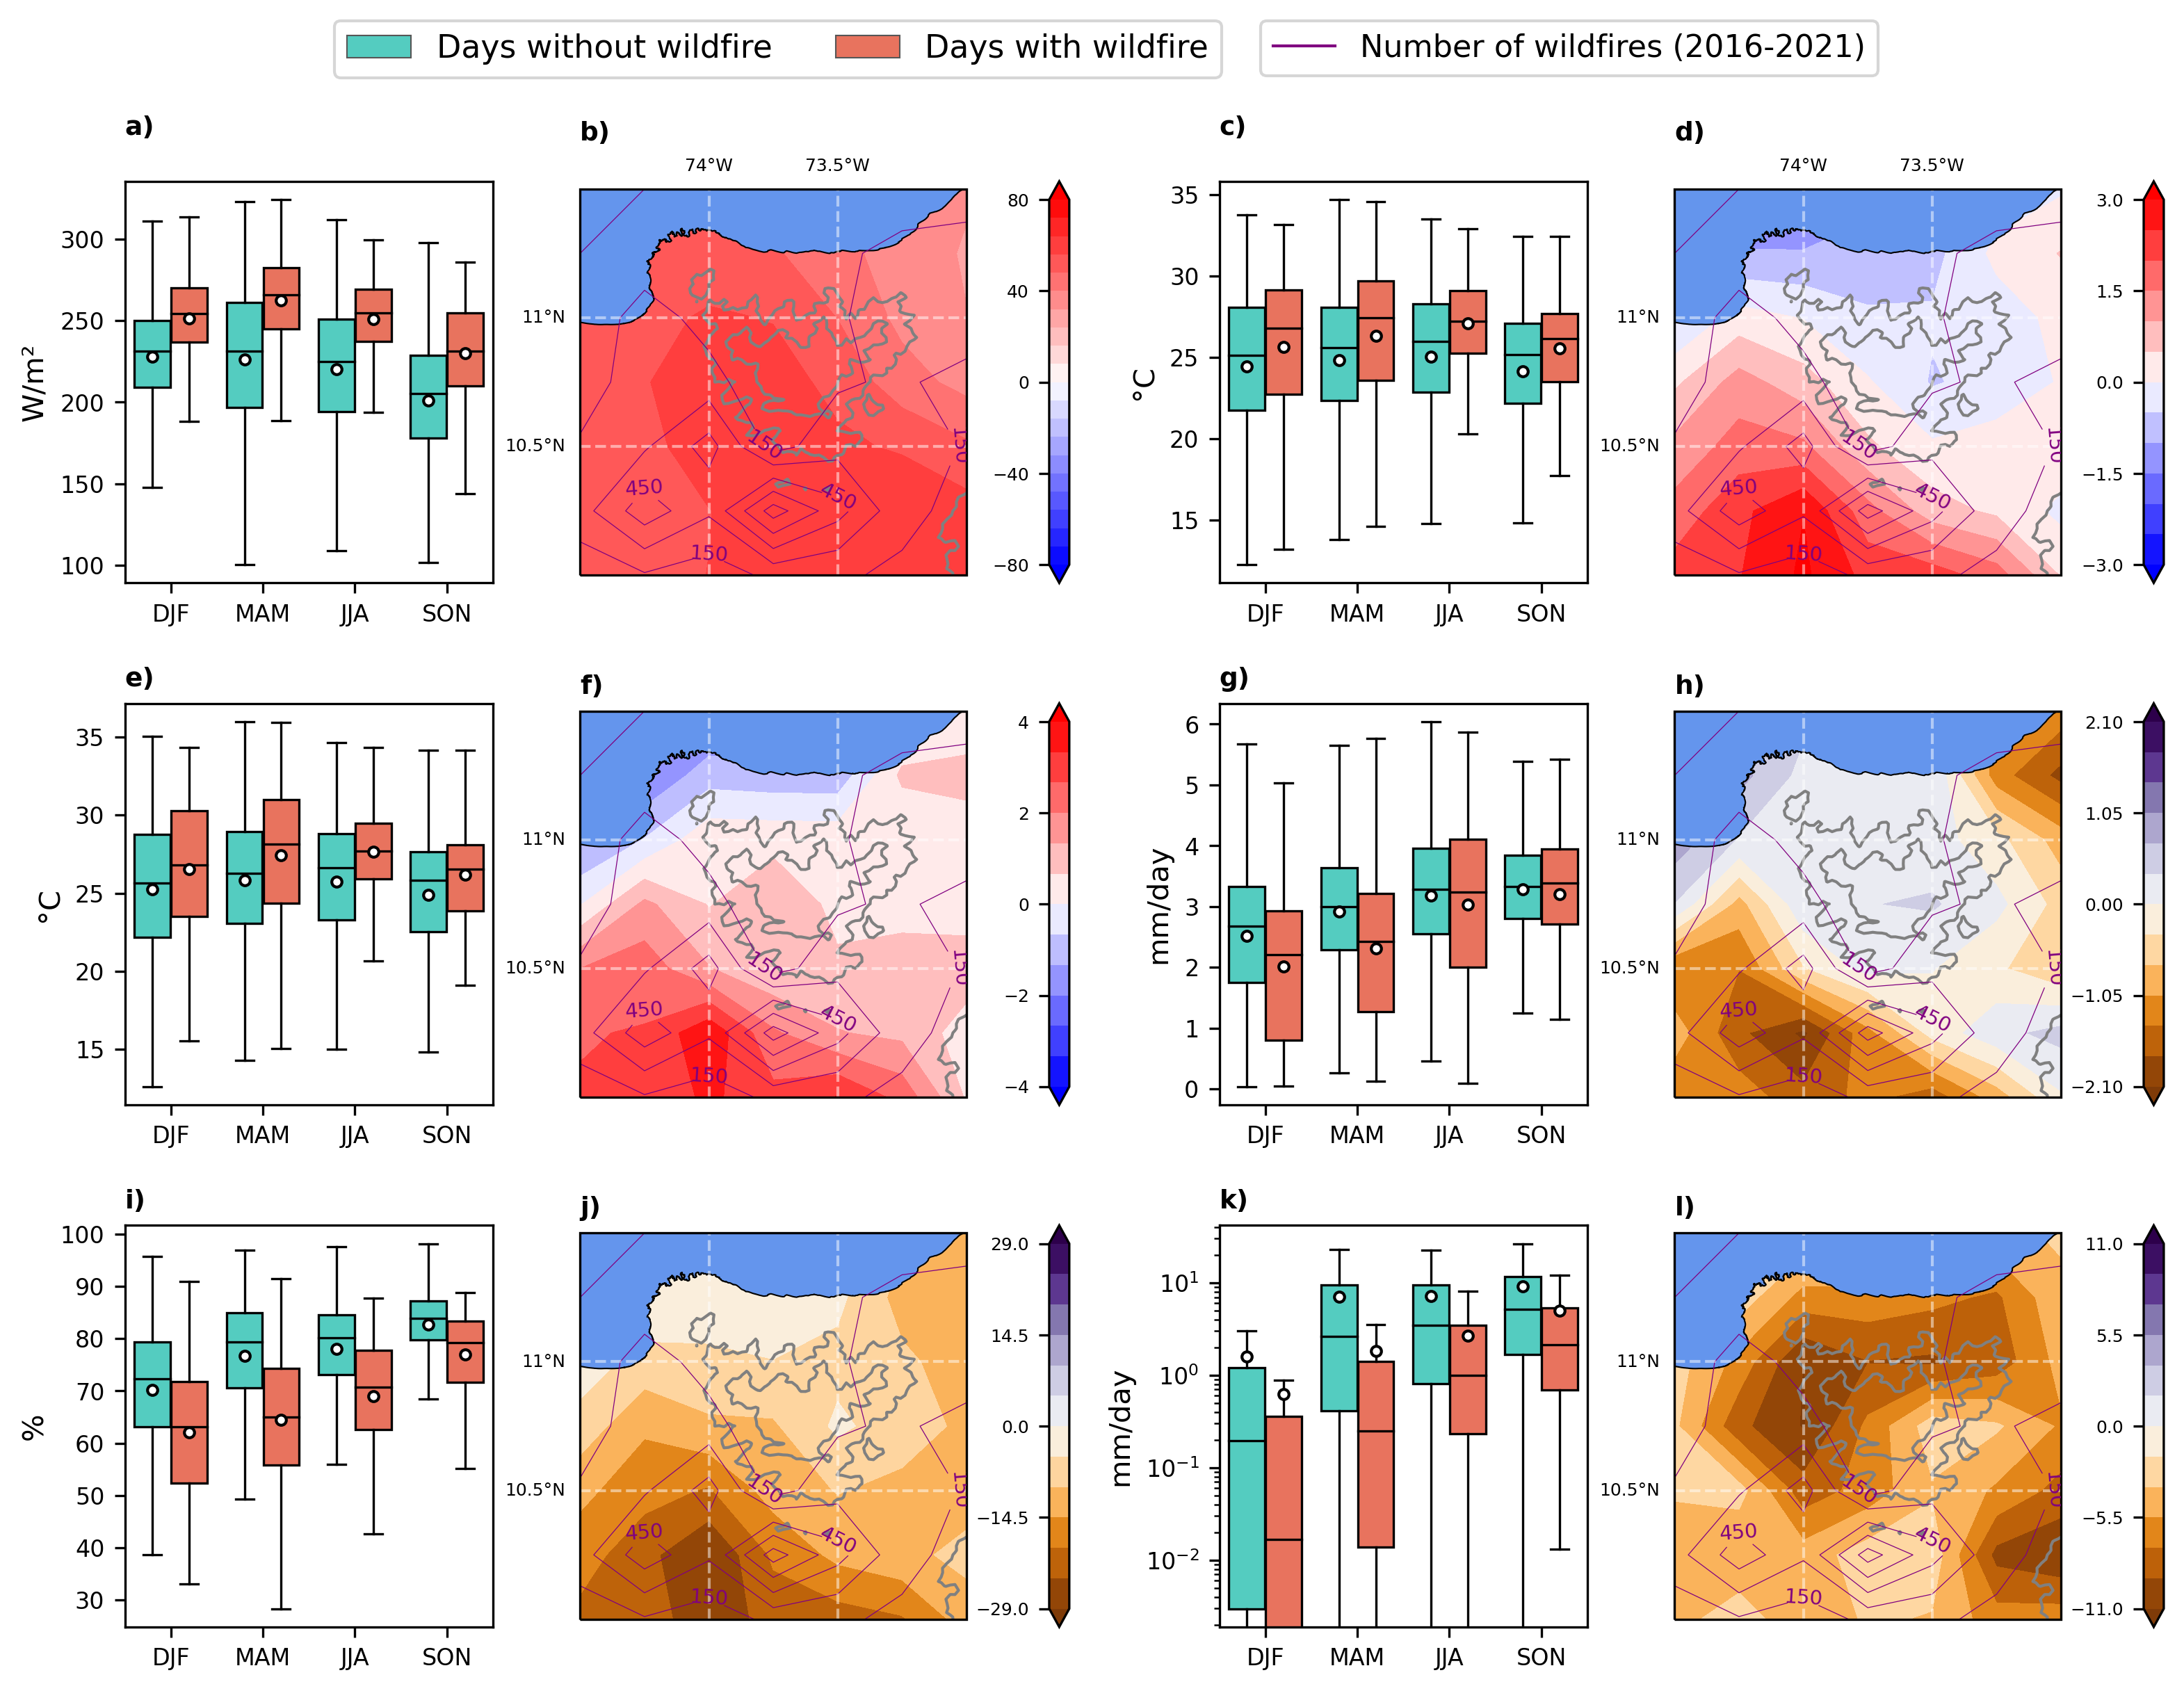

In [10]:
ylabel_name = ['a)\n  ', 'c)\n  ', 'e)','g)','i)','k)']
#ylabel_name = ['Solar radiation', 'Air temperature', 'Soil temperature',
#               'Evaporation','RH','Precipitation']

unidades = ['W/m²','°C','°C','mm/day','%','mm/day','m³/m³','m/s','mm','m²/m²','m²/m²']

flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  linestyle='none', markeredgecolor='none')

plt.figure(figsize = (13,9), dpi = 300)
gs = gridspec.GridSpec(nrows = 3, ncols = 4, hspace = 0.3, wspace = 0.19,width_ratios = [0.9,1.35,0.9,1.35])


salto = 0
for i in np.arange(0,6):#12
    plt.subplot(gs[i+salto])
    salto =salto+1
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 0.8}
    edgeprops = {'edgecolor': 'black', 'linewidth': 0.8}
    meanprops = {"marker": "o", "markerfacecolor": "white", "markeredgecolor": "k", "markersize": 3.5}
    sns.boxplot(x='trimestre', y='Valor', hue='Incendios', data=data_name[i], palette= ['turquoise', 'tomato'],
                linewidth = 1, flierprops=flierprops, showmeans=True, meanprops=meanprops, showfliers=False,
                 boxprops=edgeprops,medianprops=boxprops,
            whiskerprops=boxprops, capprops=boxprops)
    if i==5:
        plt.yscale('log')
    
    plt.xlabel('')
    plt.ylabel(unidades[i], fontsize=10)
    plt.title(ylabel_name[i], loc = "left",fontweight="bold", fontsize=9)
    ax = plt.gca()  # Obtener el eje actual
    ax.tick_params(axis='both', labelsize=8)
    if i == 1:
        plt.legend(bbox_to_anchor=(-1.2,1.4), loc='upper center', borderaxespad=0, ncol=3,  fontsize='11')
    else:
        plt.legend([],[], frameon=False) #no graficar leyenda

    
titles = ['b)','d)','f)','h)','j)','l)']  
#titles = [' ',' ',' ',' ',
#               ' ',' ']
#GRAFICAS ZONAS 
no_incendio = [nc_rad_no,nc_tem_no,nc_soiltem_no,nc_eva_no,
               nc_RH_no,nc_pre_no,nc_vol_no,nc_WIND_no,
            nc_skin_no,nc_leafhigh_no,nc_leaflow_no]
si_incendio = [nc_rad_si,nc_tem_si,nc_soiltem_si,nc_eva_si,
               nc_RH_si,nc_pre_si,nc_vol_si,nc_WIND_si,
               nc_skin_si,nc_leafhigh_si,nc_leaflow_si]

div = 12
mul = 3

levels = [np.arange(-80,80.05,(80*2)/20),np.arange(-3,3.05,(3*2)/div), np.arange(-4,4.05,(4*2)/div),
          np.arange(-2.1,2.15,(2.1*2)/div),np.arange(-29,29.05,(29*2)/div), np.arange(-11,11.05,(11*2)/div),
          np.arange(-0.14,0.145,(0.14*2)/div),np.arange(-1.5,1.55,(1.5*2)/div),
          np.arange(-7,7.05,(7*2)/div), np.arange(-0.5,0.55,(0.5*2)/div),np.arange(-0.7,0.75,(0.7*2)/div)
          ]

levels2 = [np.arange(-80,80.05,(80*2)/div*mul), np.arange(-3,3.05,(3*2)/div*mul), np.arange(-4,4.05,(4*2)/div*mul),
           np.arange(-2.1,2.15,(2.1*2)/div*mul), np.arange(-29,29.05,(29*2)/div*mul), np.arange(-11,11.05,(11*2)/div*mul),
           np.arange(-0.14,0.145,(0.14*2)/div*mul),np.arange(-1.5,1.55,(1.5*2)/div*mul),
           np.arange(-7,7.05,(7*2)/div*mul), np.arange(-0.5,0.55,(0.5*2)/div*mul),
        np.arange(-0.7,0.75,(0.7*2)/div*mul)
          ]


salto = 1
for i,prob in enumerate(no_incendio[:6]):
    nombre_var_no = list(prob.keys())[0]
    nombre_var_si = list(si_incendio[i].keys())[0]   

    ax = plt.subplot(gs[i+salto],projection= ccrs.PlateCarree())
    
    salto = salto+1
                
    curvas = plt.contour(xt0, yt0, z, levels = np.arange(1500,3001,1500),colors = 'grey', linewidths = 1, 
                         linestyle='--')
   
    if i==0 or i==1 or i==2:
        color = 'bwr'#'coolwarm'
    elif i==3 or i==4: 
        color = 'PuOr'
    elif i==5:
        color= 'PuOr'
    im = plt.contourf(nc_tem.variables['longitude'], nc_tem.variables['latitude'], 
                      si_incendio[i][nombre_var_si].mean(dim='strftime')-prob[nombre_var_no].mean(dim='strftime'), 
                      levels=levels[i], transform = ccrs.PlateCarree(), cmap = color, extend = 'both')
    
    plt.title(titles[i], fontweight = 'bold',fontsize = 9, loc='left')
    ax.set_extent([-73,-74.5,10,11.5])
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color='white', alpha = 0.5, linestyle = '--')    
    
    incendios = plt.contour(hots.longitude, hots.latitude, 
                            hots_sum, transform = ccrs.PlateCarree(),
                            levels = np.arange(0, 850.1, 150),colors = 'purple', linewidths = 0.3)
    plt.clabel(incendios, fontsize=7, inline=True, fmt = '%1.0f', levels=incendios.levels[1::2])
    
    shape_feature = ShapelyFeature(oceano['geometry'], ccrs.PlateCarree(), 
                                   facecolor='cornflowerblue', edgecolor='k', linewidth=0.5)
    ax.add_feature(shape_feature)
    
    if i ==0:
        line = Line2D([0], [0], color='purple', linewidth=1, label='Number of wildfires (2016-2021)')#'sandybrown'#mediumaquamarine
        plt.legend(handles=[line], loc='upper right', bbox_to_anchor=(3.4, 1.475), fontsize=10.7)

    
    if i==0 or i==1:
        gl.xlocator = mticker.FixedLocator([-74,-73.5]); gl.xlabels_bottom = False
    else:
        gl.xlocator = mticker.FixedLocator([-74,-73.5]); gl.xlabels_bottom = False; gl.xlabels_top = False
    gl.ylocator = mticker.FixedLocator([10.5,11]); gl.ylabels_right = False

    gl.ylabel_style = {'size': 6}
    gl.xlabel_style = {'size': 6}
    
    bar = plt.colorbar(im,ticks=levels2[i],orientation='vertical', shrink=1, pad=0.15)#cax=cax, shrink=0.5,orientation='horizontal'
    bar.ax.tick_params(labelsize=6)
    bar.ax.yaxis.set_ticks_position('left')
    #bar.set_label("Vulnerability")
    
#plt.savefig("FIGURES/JPG/Figure_5.jpg", dpi=300, bbox_inches="tight")
#plt.savefig("FIGURES/PDF/Figure_5.pdf", format="pdf", bbox_inches="tight")

In [20]:
data_no = [data_wind_no,data_skin_no,
           data_leafh_no,data_vol_no,data_leafl_no]

data_si = [data_wind_si,data_skin_si,
           data_leafh_si,data_vol_si,data_leafl_si]

for i in np.arange(0,len(data_no)):
    lista_no = trimestre_eng(data_no[i])
    data_no[i]['trimestre'] = lista_no
    
for i in np.arange(0,len(data_si)):
    lista_si = trimestre_eng(data_si[i])
    data_si[i]['trimestre'] = lista_si
    
    
data_name = ['data_vol','data_wind','data_skin','data_leafh','data_leafl']

data_name2 = data_name.copy()
    
for i in np.arange(0,len(data_name)):
    data_name[i]  = pd.concat([data_no[i],data_si[i]], axis = 0)
        
    data_name[i]['Valor'] = data_name[i]['Valor']

/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/ailindaiana/anaconda3/envs/sem/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ailindaiana/

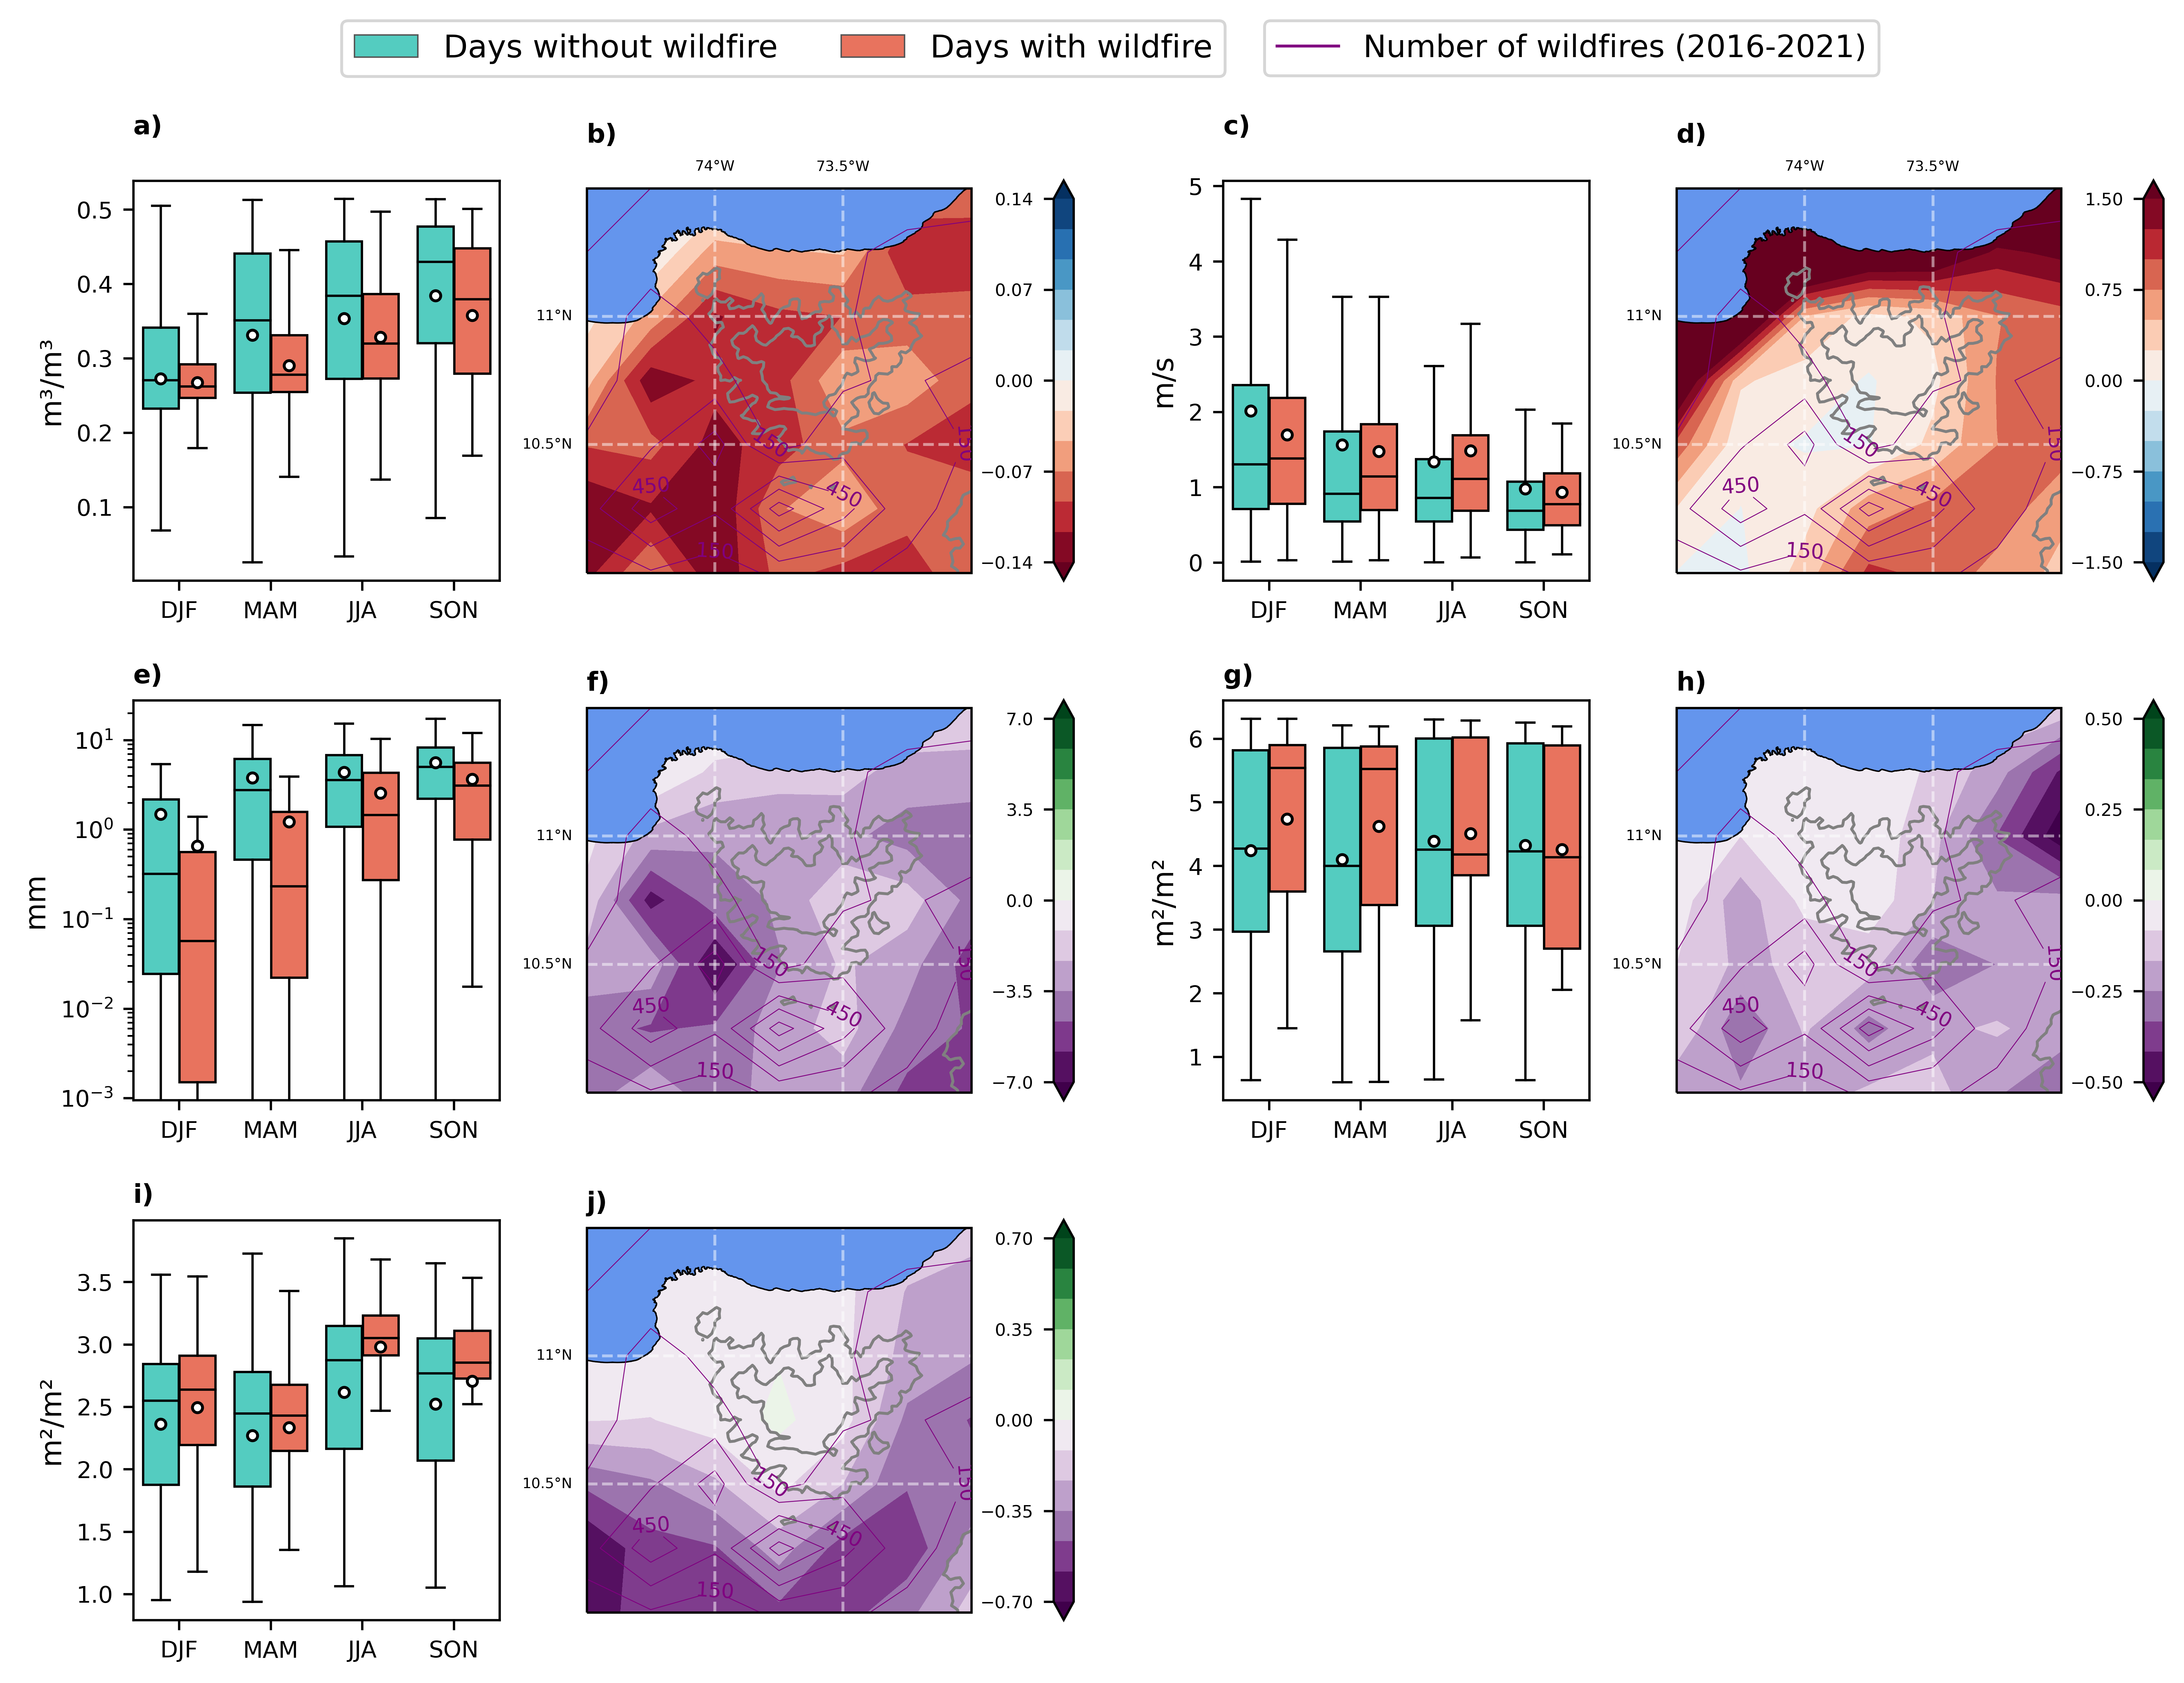

In [13]:
ylabel_name = ['a)\n  ', 'c)\n  ', 'e)','g)','i)']
#ylabel_name = ['Volumetric soil water', 'Wind speed  ', 'Leaf skin reservoir content',
#               'LAI High vegetation','LAI Low vegetation']

unidades = ['m³/m³','m/s','mm','m²/m²','m²/m²']

flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  linestyle='none', markeredgecolor='none')

plt.figure(figsize = (13,9), dpi = 600)
gs = gridspec.GridSpec(nrows = 3, ncols = 4,hspace = 0.3,wspace = 0.19,width_ratios = [0.9,1.35,0.9,1.35])


salto = 0
for i in np.arange(0,5):#12
    plt.subplot(gs[i+salto])
    salto =salto+1
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 0.8}
    edgeprops = {'edgecolor': 'black', 'linewidth': 0.8}
    meanprops = {"marker": "o", "markerfacecolor": "white", "markeredgecolor": "k", "markersize": 3.5}
    sns.boxplot(x='trimestre', y='Valor', hue='Incendios', data=data_name[i], palette= ['turquoise', 'tomato'],
                linewidth = 1, flierprops=flierprops, showmeans=True, meanprops=meanprops, showfliers=False,
                 boxprops=edgeprops,medianprops=boxprops,
            whiskerprops=boxprops, capprops=boxprops)
    if i==2:
        plt.yscale('log')
    
    plt.xlabel('')
    plt.ylabel(unidades[i], fontsize=10)
    plt.title(ylabel_name[i], loc = "left",fontweight="bold", fontsize=9)#fontsize=9
    ax = plt.gca()  # Obtener el eje actual
    ax.tick_params(axis='both', labelsize=8)
    if i == 1:
        plt.legend(bbox_to_anchor=(-1.2,1.4), loc='upper center', borderaxespad=0, ncol=3,  fontsize='11')
    else:
        plt.legend([],[], frameon=False) #no graficar leyenda

    
    
#GRAFICAS ZONAS 

titles = ['b)','d)','f)','h)','j)','l)'] 
#titles = [' ',' ',' ',' ',
#               ' ',' '] 
no_incendio = [nc_vol_no,nc_WIND_no,
               nc_skin_no,nc_leafhigh_no,nc_leaflow_no]
si_incendio = [nc_vol_si,nc_WIND_si,
               nc_skin_si,nc_leafhigh_si,nc_leaflow_si]

div = 12
mul = 3


levels = [np.arange(-0.14,0.145,(0.14*2)/div),np.arange(-1.5,1.55,(1.5*2)/div),
          np.arange(-7,7.05,(7*2)/div), np.arange(-0.5,0.55,(0.5*2)/div),np.arange(-0.7,0.75,(0.7*2)/div)
          ]

levels2 = [np.arange(-0.14,0.145,(0.14*2)/div*mul),np.arange(-1.5,1.55,(1.5*2)/div*mul),
           np.arange(-7,7.05,(7*2)/div*mul), np.arange(-0.5,0.55,(0.5*2)/div*mul),
           np.arange(-0.7,0.75,(0.7*2)/div*mul)
          ]
#fig = plt.figure(figsize=(5,15), dpi=160)
#gs = GridSpec(5,4,left = 0.02, right = 1.2, hspace=0.01, wspace=0.2, top = 0.9, bottom = 0.28, 
#              height_ratios = [1,1,1,1,0.08])

salto = 1
for i,prob in enumerate(no_incendio[:6]):
    nombre_var_no = list(prob.keys())[0]
    nombre_var_si = list(si_incendio[i].keys())[0]   

    ax = plt.subplot(gs[i+salto],projection= ccrs.PlateCarree())
    
    salto = salto+1
                
    curvas = plt.contour(xt0, yt0, z, levels = np.arange(1500,3001,1500),colors = 'grey', linewidths = 1, 
                         linestyle='--')
   
    if i==0 :
        color = 'RdBu'#'Spectral_r'
    elif i==1:
        color = 'RdBu_r'
    else: 
        color = 'PRGn'
    im = plt.contourf(nc_tem.variables['longitude'], nc_tem.variables['latitude'], 
                      si_incendio[i][nombre_var_si].mean(dim='strftime')-prob[nombre_var_no].mean(dim='strftime'), 
                      levels=levels[i], transform = ccrs.PlateCarree(), cmap = color, extend = 'both')
    
    plt.title(titles[i], fontweight = 'bold',fontsize = 9, loc='left')
    ax.set_extent([-73,-74.5,10,11.5])
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color='white', alpha = 0.5, linestyle = '--')    
    
    incendios = plt.contour(hots.longitude, hots.latitude, 
                            hots_sum, transform = ccrs.PlateCarree(),
                            levels = np.arange(0, 850.1, 150),colors = 'purple', linewidths = 0.3)
    plt.clabel(incendios, fontsize=7, inline=True, fmt = '%1.0f', levels=incendios.levels[1::2])
    
    shape_feature = ShapelyFeature(oceano['geometry'], ccrs.PlateCarree(), 
                                   facecolor='cornflowerblue', edgecolor='k', linewidth=0.5)#'cornflowerblue'

    # Agregar la característica al eje
    ax.add_feature(shape_feature)
    
    if i ==0:
        line = Line2D([0], [0], color='purple', linewidth=1, label='Number of wildfires (2016-2021)')#'sandybrown'#mediumaquamarine
        plt.legend(handles=[line], loc='upper right', bbox_to_anchor=(3.4, 1.475), fontsize=10.7)    
    
    if i==0 or i==1:
        gl.xlocator = mticker.FixedLocator([-74,-73.5]); gl.xlabels_bottom = False
    else:
        gl.xlocator = mticker.FixedLocator([-74,-73.5]); gl.xlabels_bottom = False; gl.xlabels_top = False
    gl.ylocator = mticker.FixedLocator([10.5,11]); gl.ylabels_right = False

    gl.ylabel_style = {'size': 5}
    gl.xlabel_style = {'size': 5}
    
    bar = plt.colorbar(im,ticks=levels2[i],orientation='vertical', shrink=1, pad=0.15)#cax=cax, shrink=0.5,orientation='horizontal'
    bar.ax.tick_params(labelsize=6)
    bar.ax.yaxis.set_ticks_position('left')
    #bar.set_label("Vulnerability")
#plt.savefig("FIGURES/JPG/Figure_6.jpg", dpi=300, bbox_inches="tight")
#plt.savefig("FIGURES/PDF/Figure_6.pdf", format="pdf", bbox_inches="tight")